In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### <center> Objective - 1 [Prepare the data for analysis] </center>
Your first objective is to read in the relevant columns from the dataset and create new calculated columns for analysis.

In [2]:
# Read in 4 columns from the powerconsumption.csv file and cast 'Datetime' as a datetime datatype.
power_df = pd.read_csv('powerconsumption.csv',
                 usecols=['Datetime','PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
                 parse_dates = ['Datetime']
                 )
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


In [3]:
# Create a 'total_consumption' column which represents the sum of the three 'PowerConsumption' columns.
power_df['TotalConsumption'] = power_df.filter(like='PowerConsumption').sum(axis=1)
power_df.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,TotalConsumption
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627


In [4]:
# Create two columns by extracting the dateparts from the 'Datetime' column.
power_df['Hour'] = power_df['Datetime'].dt.hour
power_df['WeekDay'] = power_df['Datetime'].dt.dayofweek + 1

power_df.tail()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,TotalConsumption,Hour,WeekDay
52411,2017-12-30 23:10:00,31160.45627,26857.31820,14780.31212,72798.08659,23,6
52412,2017-12-30 23:20:00,30430.41825,26124.57809,14428.81152,70983.80786,23,6
52413,2017-12-30 23:30:00,29590.87452,25277.69254,13806.48259,68675.04965,23,6
52414,2017-12-30 23:40:00,28958.17490,24692.23688,13512.60504,67163.01682,23,6
52415,2017-12-30 23:50:00,28349.80989,24055.23167,13345.49820,65750.53976,23,6


#### <center> Objective - 2 [Visualize consumption over time] </center>
Your second objective is to build a stacked line chart visualizing the power consumption for the month of January 2017.

In [5]:
# Resample the data into 1 hour increments.
hourly_df = power_df.set_index('Datetime').resample('H')['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'].mean()

In [6]:
# Filter the data down to the month of January 2017.
hourly_jan2017_df = hourly_df.loc["2017-01"]
hourly_jan2017_df

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,
2017-01-01 00:00:00,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,20475.949367,12921.580547,14317.108433
...,...,...,...
2017-01-31 19:00:00,42843.544303,25438.297875,25731.084337
2017-01-31 20:00:00,43023.797470,25429.787233,26003.855422
2017-01-31 21:00:00,41560.506330,25259.574468,25527.710845


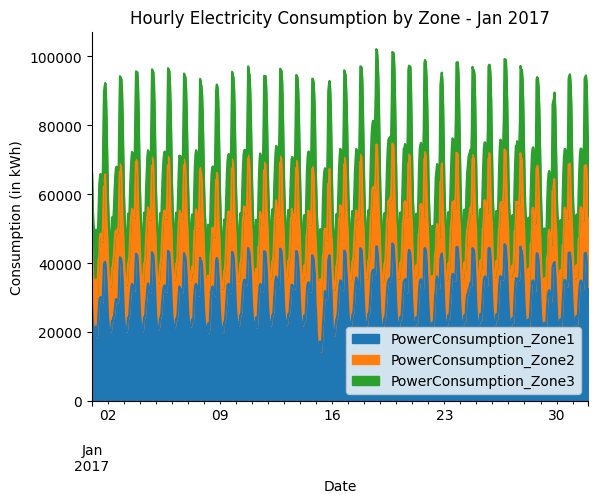

In [7]:
# Create a stacked line chart using the 'PowerConsumption' columns.
hourly_jan2017_df.plot.area(
    title = 'Hourly Electricity Consumption by Zone - Jan 2017',
    xlabel = 'Date',
    ylabel = 'Consumption (in kWh)',
)
plt.savefig('hourlyECArea.png')
sns.despine()

#### <center> Objective - 3 [Visualize consumption seasonality] </center>
Your final objective is to build a heatmap for the average power consumption by day of week & hour of day and report any interesting findings.

In [8]:
# Create a pivot table where the rows are day of week, the columns are the hour of day, and the values represent the average total consumption.
power_pivot = power_df.pivot_table(
    index='WeekDay',
    columns='Hour',
    values='TotalConsumption',
    aggfunc='mean'
)
power_pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
1,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
2,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
3,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
4,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
5,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
6,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
7,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676


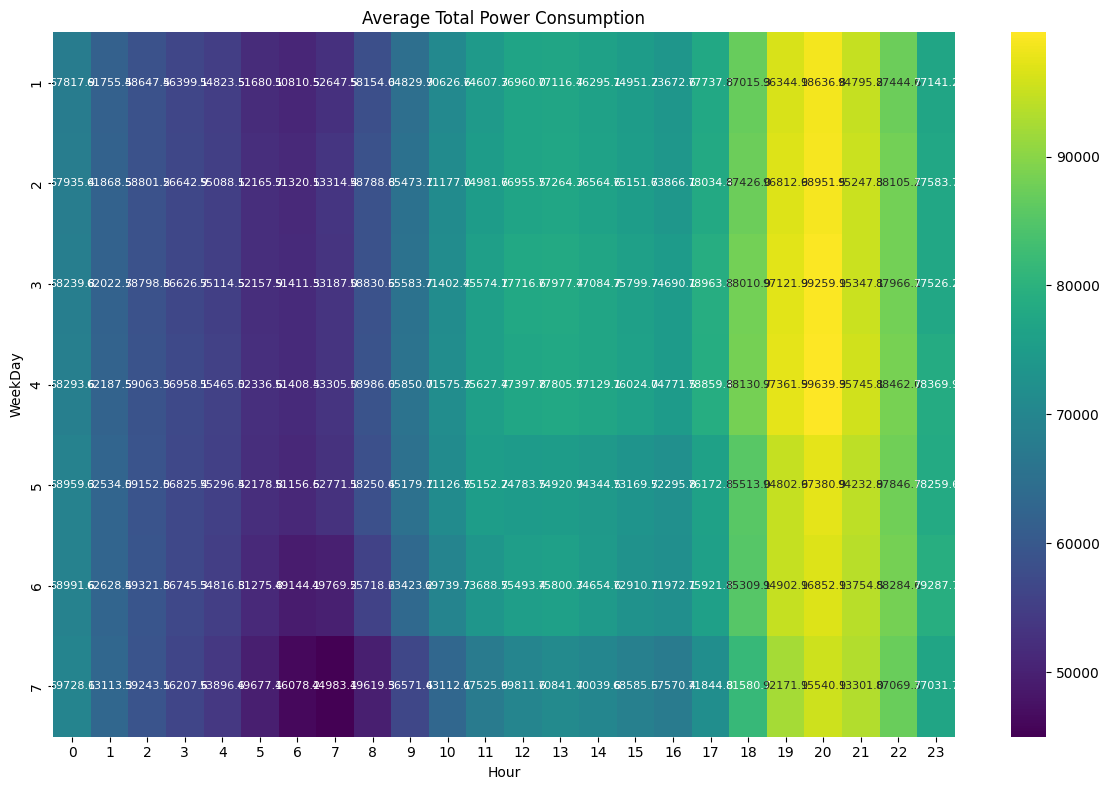

In [9]:
# Create a heatmap using the pivot table. What trends or patterns do you notice in power consumption?
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.heatmap(power_pivot, cmap='viridis', annot=True, fmt='.1f', annot_kws={'size' : 8})  # annot=True adds the values in the heatmap
plt.title('Average Total Power Consumption')
plt.tight_layout()
plt.savefig('avgPCHeatmap.png')
plt.show()
# The evening times (at 7-9 pm) saw highest rate of power consumption.

In [10]:
# Challenge: Instead of integers, use the names for each day of the week.
weekday_dict = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
power_df['WeekDayName'] = power_df['WeekDay'].map(weekday_dict)
power_df.pivot_table(
    index = 'WeekDayName',
    columns = 'Hour',
    values = 'TotalConsumption',
    aggfunc = 'mean'
)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDayName,,,,,,,,,,,,,,,,,,,,,
Fri,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
Mon,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
Sat,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
Sun,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676
Thu,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
Tue,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
Wed,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
